# 앙상블 기법 예제


# HAR, Human Activity Recognition

> IMU 센서(폰에 있는 가속도/자이로 센서 사용)를 활용해서 사람의 행동을 인식하는 실험

<img src="https://github.com/ElaYJ/supplement/assets/153154981/adde2e85-1ab3-421a-b4f5-6d3f9ac34d9c" width="35%" height="35%"></br>

- [데이터 공식 경로](https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones)

### --▶ HAR dataset

#### 🎫 feature name

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/features.txt"

feature_name_df = pd.read_csv(url, sep='\s+', header=None, names=['column_index', 'column_name'])
feature_name_df
#--> 지금은 특성 이름만 읽은 것!
#--> 특성만 무려 561개
#--> 특성명의 소문자 't'는 시간영역을, 소문자 'f'는 주파수를 의미

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)"
557,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,559,"angle(X,gravityMean)"
559,560,"angle(Y,gravityMean)"


In [10]:
feature_name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   column_index  561 non-null    int64 
 1   column_name   561 non-null    object
dtypes: int64(1), object(1)
memory usage: 8.9+ KB


In [3]:
feature_name = feature_name_df.iloc[:, 1].values.tolist()
feature_name[:10]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X']

#### 🎫 X_train, X_test

- X_train.txt의 용량이 63MB --> 대용량 데이터를 다루게 됨.

In [4]:
X_train_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/X_train.txt'
X_test_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/X_test.txt'

X_train = pd.read_csv(X_train_url, sep = '\s+',header=None)
X_test = pd.read_csv(X_test_url, sep = '\s+',header=None)

X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 31.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 12.6 MB


In [5]:
X_train.columns = feature_name
X_test.columns = feature_name

X_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


#### 🎫 y_train, y_test

In [6]:
y_train_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/y_train.txt'
y_test_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/y_test.txt'

y_train = pd.read_csv(y_train_url, sep='\s+', header=None, names=['action'])
y_test = pd.read_csv(y_test_url, sep='\s+', header=None, names=['action'])

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7352, 561), (2947, 561), (7352, 1), (2947, 1))

#### 🎫 각 액션 별 데이터의 수

- 각 라벨 별 정의

	<img src="https://github.com/ElaYJ/supplement/assets/153154981/2d724082-28b0-4661-a573-67d0c455e2d0" width="50%" height="50%">

In [8]:
y_train['action'].value_counts() #--> 라벨의 개수에 차이가 나는 Inbalance Data이다.

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64

</br>

### --▶ Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(max_depth=4, random_state=13)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)

accuracy_score(y_test, pred)

0.8096369189005769

#### 🎫 GridSearchCV

- Train Dataset에 다양한 max_depth를 적용하기 위해 GridSearchCV를 이용한다.

- max_depth별로 표로 성능을 정리한다.

🔰 Train Data

⭐ `grid_cv.best_score_`

- best_score는 Train Data를 cv(k-fold) = 5 등분하여
- 그 중 하나를 Test Data로 활용했을 때의 정확도가 가장 좋은 값을 의미한다.
- 이 값은 Training Data의 Cross Validation(cv, 교차검정) Score이다.
- 이 값으로 Best Model은 찾아서 실제 Test Data를 적용했을 때의 정확도(Test_Label vs Predict_Val)를 파악해야 한다.

In [11]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [6, 8, 10, 12, 16, 20, 24]}

grid_cv = GridSearchCV(dt_clf, param_grid=params, cv=5, scoring='accuracy', return_train_score=True)
#--> cv= 옵션은 cross validation(교차검정)의 k-fold 값 설정이다.

grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=4, random_state=13),
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [12]:
grid_cv.best_score_, grid_cv.best_params_
#--> best_score는 Train Data를 cv(k-fold) = 5 등분하여
#--> 그 중 하나를 Test Data로 활용했을 때의 정확도가 가장 좋은 값을 의미한다.
#--> 이 값은 Training Data의 Cross Validation(cv, 교차검정) Score이다.
#--> 이 값으로 Best Model은 찾아서 실제 Test Data를 적용했을 때의 정확도(Test_Label vs Predict_Val)를 파악해야 한다.

(0.8543335321892183, {'max_depth': 8})

In [13]:
grid_cv.cv_results_

{'mean_fit_time': array([4.87584877, 6.43434486, 7.53504448, 8.08205194, 8.99414701,
        9.25742359, 8.96462326]),
 'std_fit_time': array([0.05871979, 0.13690268, 0.19863991, 0.66578951, 0.78867695,
        1.15864541, 0.70975002]),
 'mean_score_time': array([0.01528654, 0.01303911, 0.01299481, 0.01115513, 0.01098695,
        0.0121635 , 0.01115446]),
 'std_score_time': array([0.00283976, 0.00168912, 0.00073538, 0.00147932, 0.00166698,
        0.00160116, 0.00145004]),
 'param_max_depth': masked_array(data=[6, 8, 10, 12, 16, 20, 24],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 6},
  {'max_depth': 8},
  {'max_depth': 10},
  {'max_depth': 12},
  {'max_depth': 16},
  {'max_depth': 20},
  {'max_depth': 24}],
 'split0_test_score': array([0.81509177, 0.82324949, 0.81781101, 0.79401768, 0.79469748,
        0.8028552 , 0.80013596]),
 'split1_test_score': array([0.86811693, 0.82528892, 0.

In [14]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

In [19]:

train_cv_rlt = cv_results_df[['param_max_depth','mean_test_score','mean_train_score']]
train_cv_rlt

,param_max_depth,mean_test_score,mean_train_score
0,6,0.843444,0.944879
1,8,0.854334,0.982692
2,10,0.847125,0.993369
3,12,0.841958,0.997212
4,16,0.841958,0.999660
5,20,0.842365,0.999966
6,24,0.841821,1.000000


🔰 Test Data

- train과 test의 score 차이가 있으므로 따로 다운로드 받은 Test Data에 대한 Depth별 성능을 확인해 본다.

In [16]:
max_depths = [6, 8, 10, 12, 16, 20, 24]
accuracy = []

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)

    accuracy.append(accuracy_score(y_test, pred))
    
    # accuracy = accuracy_score(y_test, pred)
    # print("Max_Depth =", depth, ", Accuracy =", accuracy)    

test_cv_rlt = pd.DataFrame({'Max_Depth': max_depths, 'Accuracy': accuracy})
test_cv_rlt

,Max_Depth,Accuracy
0,6,0.855786
1,8,0.870716
2,10,0.867323
3,12,0.864608
4,16,0.857482
5,20,0.854768
6,24,0.854768


In [17]:
test_cv_rlt.sort_values(by='Accuracy', ascending=False)

,Max_Depth,Accuracy
1,8,0.870716
2,10,0.867323
3,12,0.864608
4,16,0.857482
0,6,0.855786
5,20,0.854768
6,24,0.854768


In [20]:
test_cv_rlt['Train_Acc'] = train_cv_rlt['mean_test_score']
test_cv_rlt

,Max_Depth,Accuracy,Train_Acc
0,6,0.855786,0.843444
1,8,0.870716,0.854334
2,10,0.867323,0.847125
3,12,0.864608,0.841958
4,16,0.857482,0.841958
5,20,0.854768,0.842365
6,24,0.854768,0.841821


🚩 __Best Model__

In [18]:
best_dt_clf = grid_cv.best_estimator_
best_dt_clf

DecisionTreeClassifier(max_depth=8, random_state=13)

In [21]:

best_pred = best_dt_clf.predict(X_test)
accuracy_score(y_test, best_pred)

0.8734306073973532

</br>

### --▶ Random Forest

- 랜덤포레스트 알고리즘을 적용해 모델 생성

#### 🔰 Train Data

GridsearchCV</br>
@Param

- `max_depth` : Decision Tree에 적용할 param

- `n_estimators` : Decision Tree를 몇 개 사용할 지

- `min_samples_leaf` : DT의 마지막 노드의 최소 데이터 개수, max_depth 까지 가지 않아도 데이터 개수가 너무 작으면 거기서 STOP~!!

- `min_samples_split` : 노드 분할 기준에서 최소한으로 남길 데이터의 개수 지정

- 'min_samples_leaf'와 'min_samples_split'는 모델에 큰 영형을 주지 않는다.

- `n_jobs=` 옵션은 CPU Core 몇 개를 써서 학습을 시킬지 대한 설정이다. -1은 다 쓰라는 의미이다.

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {
	'max_depth': [6, 8, 10],
	'n_estimators': [50, 100, 200],
	'min_samples_leaf': [8, 12],
	'min_samples_split': [8, 12]
}

rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

c:\Users\happy\miniconda3\envs\ds_study\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=13),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10], 'min_samples_leaf': [8, 12],
                         'min_samples_split': [8, 12],
                         'n_estimators': [50, 100, 200]})

#### 🔰 성능 정리

In [23]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',
       'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [24]:
target_col = ['rank_test_score', 'mean_test_score', 'param_n_estimators', 'param_max_depth']
cv_results_df[target_col].sort_values(by='rank_test_score').head()

,rank_test_score,mean_test_score,param_n_estimators,param_max_depth
28,1,0.915125,100,10
25,1,0.915125,100,10
23,3,0.912813,200,8
20,3,0.912813,200,8
35,5,0.912541,200,10


👉 `mean_test_score`

- 이 값은 Train Data의 Validation(cv) Score이다.

- 랜덤포레스트를 사용할 경우 성능이 좋다. --> 91.5%

#### 🚩 __Best Model__

In [25]:
grid_cv.best_params_

{'max_depth': 10,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'n_estimators': 100}

In [26]:
grid_cv.best_score_

0.9151251360174102

#### 🔰 Test Data에 적용

- 위에서 찾은 베스트 모델로 다시 Train Data를 학습시킨 후 Test Data로 성능을 확인한다.

In [27]:
rf_clf_best = grid_cv.best_estimator_
rf_clf_best.fit(X_train, y_train)

best_pred = rf_clf_best.predict(X_test)

accuracy_score(y_test, best_pred)

c:\Users\happy\miniconda3\envs\ds_study\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9205972175093315

👉 결과

- Decision Tree(87.1%)에 비해 92.1%로 성능이 좋다.

</br>

#### 🎫 중요 특성 확인 및 관찰

- 주요 특성 20개를 찾고 시각화하여 비교해 본다.

In [38]:
best_cols_values = rf_clf_best.feature_importances_
best_cols = pd.Series(best_cols_values, index=X_train.columns)
best_cols

tBodyAcc-mean()-X                       0.000096
tBodyAcc-mean()-Y                       0.000217
tBodyAcc-mean()-Z                       0.000058
tBodyAcc-std()-X                        0.007843
tBodyAcc-std()-Y                        0.000252
                                          ...   
angle(tBodyGyroMean,gravityMean)        0.000203
angle(tBodyGyroJerkMean,gravityMean)    0.000270
angle(X,gravityMean)                    0.034638
angle(Y,gravityMean)                    0.026553
angle(Z,gravityMean)                    0.012837
Length: 561, dtype: float64

In [39]:

top20_cols = best_cols.sort_values(ascending=False)[:20]
top20_cols

angle(X,gravityMean)               0.034638
tGravityAcc-max()-Y                0.032518
tGravityAcc-energy()-X             0.031309
tGravityAcc-mean()-X               0.029513
tGravityAcc-min()-X                0.027775
tGravityAcc-max()-X                0.027662
angle(Y,gravityMean)               0.026553
tGravityAcc-mean()-Y               0.026052
tGravityAcc-min()-Y                0.023037
tGravityAcc-energy()-Y             0.018678
tGravityAcc-mean()-Z               0.015688
angle(Z,gravityMean)               0.012837
fBodyAcc-mad()-X                   0.012558
tBodyAcc-max()-X                   0.011970
fBodyAccJerk-bandsEnergy()-1,24    0.011803
tBodyAccJerk-entropy()-X           0.011647
tGravityAccMag-std()               0.011451
tBodyAccJerk-energy()-X            0.011333
tGravityAcc-arCoeff()-Z,1          0.011257
fBodyAccJerk-max()-X               0.011040
dtype: float64

👉 각 특성들의 중요도가 개별적으로 높지 않다.

In [37]:
top20_cols.index #--> 주요 특성 20개

Index(['angle(X,gravityMean)', 'tGravityAcc-max()-Y', 'tGravityAcc-energy()-X',
       'tGravityAcc-mean()-X', 'tGravityAcc-min()-X', 'tGravityAcc-max()-X',
       'angle(Y,gravityMean)', 'tGravityAcc-mean()-Y', 'tGravityAcc-min()-Y',
       'tGravityAcc-energy()-Y', 'tGravityAcc-mean()-Z',
       'angle(Z,gravityMean)', 'fBodyAcc-mad()-X', 'tBodyAcc-max()-X',
       'fBodyAccJerk-bandsEnergy()-1,24', 'tBodyAccJerk-entropy()-X',
       'tGravityAccMag-std()', 'tBodyAccJerk-energy()-X',
       'tGravityAcc-arCoeff()-Z,1', 'fBodyAccJerk-max()-X'],
      dtype='object')

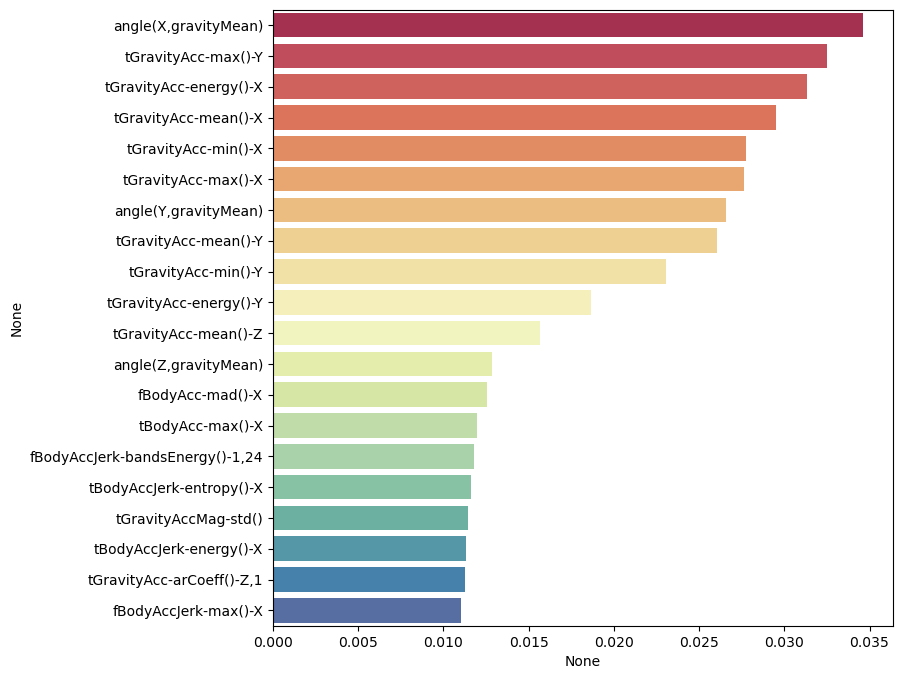

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))
sns.barplot(x=top20_cols, y=top20_cols.index, hue=top20_cols.index, legend=False, palette='Spectral')
plt.show()

#### 🎫 주요 특성 20개만으로 모델 생성

- 모델에 기여도가 높았던 Top20의 특성만 가지고 다시 성능을 확인해 본다.

- 561개의 특성보다 20개의 특성만 보면 연산속도가 정말 빠를 것이다. 비록 acc는 포기하더라도~

In [40]:
X_train_20 = X_train[top20_cols.index]
X_test_20 = X_test[top20_cols.index]

In [42]:
y_train.values.reshape(-1,), len(y_train.values.reshape(-1,))

(array([5, 5, 5, ..., 2, 2, 2], dtype=int64), 7352)

In [43]:
rf_clf_best_20 = grid_cv.best_estimator_
rf_clf_best_20.fit(X_train_20, y_train.values.reshape(-1,))

pred_best_20 = rf_clf_best_20.predict(X_test_20)

accuracy_score(y_test, pred_best_20)

0.8177807940278249